<a href="https://colab.research.google.com/github/manigopinalajala/ec_raptorfiles/blob/master/final_half_upto_gcn_GOPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_recommenders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 2.4 MB/s eta 0:00:00


In [2]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 15.0 MB/s eta 0:00:00


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, MaxPooling2D)
import os
import cv2
from tensorflow.keras.optimizers import Adam
from keras.layers import DepthwiseConv2D
from keras.layers import Input
from keras.losses import CategoricalCrossentropy
import shutil
from PIL import Image
import numpy as np
from keras.layers import DepthwiseConv2D
from keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from matplotlib import pyplot as plt
import glob
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D,Conv1D
#from tensorflow_addons import SpatialPyramidPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import SeparableConv2D
#from tensorflow.keras.layers import SpatialPyramidPooling2D
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D,MaxPooling2D,AveragePooling2D
from tensorflow.keras import activations
#import tensorflow_recommenders as tfrs
import tensorflow_addons as tfa
from keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
import tensorflow_recommenders as tfr

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
from PIL import Image as im
train_images = []
count=0
path = "/content/drive/MyDrive/glucomadata/train/tr_images/"
for file in  sorted(os.listdir(path)):
        img = cv2.imread("/content/drive/MyDrive/glucomadata/train/tr_images/"+file, cv2.IMREAD_COLOR) 
        
        if img is None:
          pass
        else:
          img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = img/255.
          train_images.append(img)
        count=count+1
        if (count==300):
          break
        

In [6]:
print(np.asarray(train_images).shape)
train_images2=train_images[:200]
train_images1=np.array(train_images2)
print(train_images1.shape)
print(type(train_images1))
#print(img1.shape)

(299, 512, 512, 3)
(200, 512, 512, 3)
<class 'numpy.ndarray'>


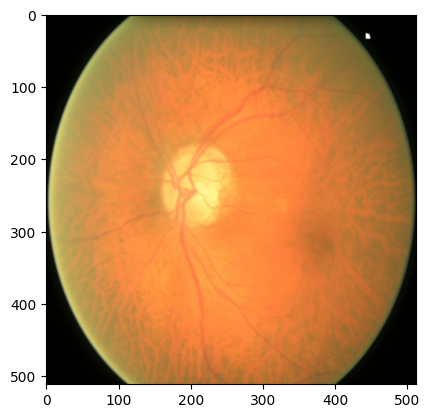

In [7]:
plt.imshow(train_images1[2])

In [8]:
image_path="/content/drive/MyDrive/glucomadata/train/tr_masks/"
images = [img for img in sorted(os.listdir(image_path)) if img.endswith(".png")]

In [9]:
img = np.array(Image.open("/content/drive/MyDrive/glucomadata/train/tr_masks/001.png"))
img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
img.shape
np.unique(img)

array([0, 1, 2], dtype=uint8)

In [10]:
k= keras.utils.to_categorical(img, num_classes=3)[:,:,1:]

In [11]:
import numpy as np
import cv2
import os
from PIL import Image as im
train_masks = []
path = "/content/drive/MyDrive/glucomadata/train/tr_masks/"
for file in  images:
        img = np.array(Image.open("/content/drive/MyDrive/glucomadata/train/tr_masks/"+file))
        
        img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)

        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = img/255.
        train_masks.append(img)

In [12]:
np.shape(train_masks)

(450, 512, 512)

In [13]:
train_masks2=train_masks[:200]
train_masks1=np.array(train_masks2)
print(train_masks1.shape)
print(type(train_masks1))
#print(img1.shape)

(200, 512, 512)
<class 'numpy.ndarray'>


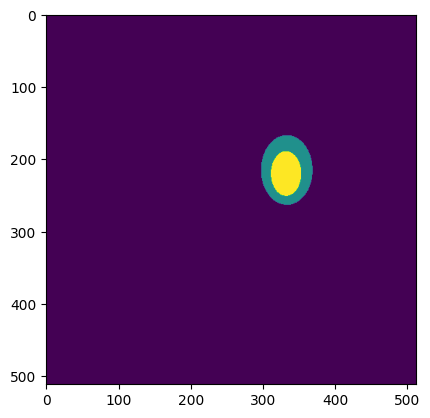

In [14]:
plt.imshow(train_masks1[5])

In [15]:
"""

import cv2
import glob

def clahe_preprocessing(image, clip_limit=2.0, grid_size=(8,8)):
    
    # Convert image to LAB color space
    if image is None:
      pass
    else:

      lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

      # Split channels
      l, a, b = cv2.split(lab)

      # Apply CLAHE to the L channel
      clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
      l_clahe = clahe.apply(l)

      # Merge channels and convert back to RGB color space
      lab_clahe = cv2.merge((l_clahe, a, b))
      output = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

      return output


# Load images
# images = glob.glob('/content/drive/MyDrive/glucomadata/train/tr_images/*.jpg')[:400] # Limit to 400 images for example purposes

# Preprocess images, resize to (512, 512), and save in list
preprocessed_images = []
path = "/content/drive/MyDrive/glucomadata/train/tr_images/"
for image in  sorted(os.listdir(path)):
    # Load image
    image = cv2.imread("/content/drive/MyDrive/glucomadata/train/tr_images/"+image, cv2.IMREAD_COLOR)

    # Preprocess image using CLAHE
    preprocessed_image = clahe_preprocessing(image)

    # Resize image to (512, 512)
    if image is None:
      pass
    else:

      preprocessed_image = cv2.resize(preprocessed_image, (512, 512))
      preprocessed_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)
      # Append preprocessed image to list
      preprocessed_images.append(preprocessed_image)
"""

'\n\nimport cv2\nimport glob\n\ndef clahe_preprocessing(image, clip_limit=2.0, grid_size=(8,8)):\n    \n    # Convert image to LAB color space\n    if image is None:\n      pass\n    else:\n\n      lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)\n\n      # Split channels\n      l, a, b = cv2.split(lab)\n\n      # Apply CLAHE to the L channel\n      clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)\n      l_clahe = clahe.apply(l)\n\n      # Merge channels and convert back to RGB color space\n      lab_clahe = cv2.merge((l_clahe, a, b))\n      output = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)\n\n      return output\n\n\n# Load images\n# images = glob.glob(\'/content/drive/MyDrive/glucomadata/train/tr_images/*.jpg\')[:400] # Limit to 400 images for example purposes\n\n# Preprocess images, resize to (512, 512), and save in list\npreprocessed_images = []\npath = "/content/drive/MyDrive/glucomadata/train/tr_images/"\nfor image in  sorted(os.listdir(path)):\n    # Load imag

In [16]:
np.shape(train_masks1)

# k= to_categorical(train_masks1[1], num_classes=2)[:,:,1:]

(200, 512, 512)

In [17]:
from tensorflow.keras.utils import to_categorical
y_train_final=[]
n_classes=3
for y_train1 in (train_masks1):
  y_train1
  y_train_final.append(to_categorical(y_train1, num_classes=n_classes)[:,:,1:])
# print(train_masks_cat.shape)
# y_train_cat = train_masks_cat.reshape((y_train.shape[0],y_train.shape[2], n_classes))
y_train_1= np.array(y_train_final)

In [18]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS=3

In [19]:
def dgcn(tensor):

  #Graph convolution in Coordinate space
  #Coordinate space projection
  
  v=AveragePooling2D(pool_size = 2, strides = 2)(tensor)
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
  
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
  
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
 
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
 
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
  
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
  
  v=DepthwiseConv2D(kernel_size=(3,3),strides=(2,2))(v)
 
  

  #coordinate space GCN
  vs=v
  delta=Conv2D(128,kernel_size=(1,1))(vs)
  
  psi=Conv2D(128,kernel_size=(1,1))(vs)
  
  #psi=tf.transpose(psi,perm=[0,3,2,1])
  
  upsilon=Conv2D(128,kernel_size=(1,1))(vs)
  
  AS=dot_product(psi,upsilon)
  
  #AS=tf.transpose(AS,perm=[0,3,2,1])
 
  AVS=dot_product(delta,AS) 
  
  #AVS=tf.expand_dims(AVS, axis=-1)
  
  upsample=tf.keras.layers.UpSampling2D(size=512, interpolation='nearest')(AVS)
  
  out1=Conv2D(128,kernel_size=(1,1))(upsample)


  #Graph Convolution In Feature Space
  #Feature Space projection
  #D=channels
  #D1=D/2
  #D2=D/4
  D=64
  D1=32
  D2=16
  theta=Conv2D(128,kernel_size=(1,1))(tensor)
  theta=tf.keras.layers.BatchNormalization()(theta)
  theta=tf.keras.layers.Activation('relu')(theta)
  hft=theta
  #hft=tf.transpose(theta)
  psi=Conv2D(128,kernel_size=(1,1))(tensor)
  psi=tf.keras.layers.BatchNormalization()(psi)
  psi=tf.keras.layers.Activation('relu')(psi)
  vf=dot_product(hft,psi)
  
  #vf=tf.transpose(vf)
  af=Conv1D(128,kernel_size=1)(vf)
  
  af=tf.keras.layers.BatchNormalization()(af)
  
  af=tf.keras.layers.Activation('relu')(af)
  
  w=vf+af
 
  wf=Conv1D(128,1)(w)

  wf=tf.keras.layers.BatchNormalization()(wf)
 

  wf=tf.keras.layers.Activation('relu')(wf)
 

  #wf=tf.transpose(wf)
  h=dot_product(theta,wf)
  
  #h=tf.expand_dims(h, axis=-1)
  out3=Conv2D(128,kernel_size=(1,1))(h)
  
  out3=tf.keras.layers.BatchNormalization()(out3)
  
  out3=tf.keras.layers.Activation('relu')(out3)
  
  res=out1+tensor+out3
  

  
  
  return res


def dot_product(tensor1,tensor2):
  # perform element-wise multiplication
  elementwise_mult = tf.multiply(tensor1, tensor2)

  # sum along the appropriate axis
  #dot_prod = tf.reduce_sum(elementwise_mult, axis=-1)
  return elementwise_mult

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose

def conv_block(inputs, filters, kernel_size=3, activation='relu'):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation=activation)(inputs)
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation=activation)(x)
    return x

def UNet(input_shape):
    # Define input layer
    # inputs = Input(shape=input_shape)
    
    # Downsample path
    conv1 = conv_block(input_shape, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = conv_block(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = conv_block(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = conv_block(pool3, 512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    # Bottom
    conv5 = conv_block(pool4, 1024)
    
    # Upsample path
    up6 = Conv2DTranspose(filters=512, kernel_size=2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4])
    conv6 = conv_block(up6, 512)
    
    up7 = Conv2DTranspose(filters=256, kernel_size=2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = conv_block(up7, 256)
    
    up8 = Conv2DTranspose(filters=128, kernel_size=2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = conv_block(up8, 128)
    
    up9 = Conv2DTranspose(filters=64, kernel_size=2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = conv_block(up9, 64)
    
    # Output layer
    outputs = Conv2D(filters=1, kernel_size=1, activation='sigmoid')(conv9)
    
    # Create model
    # model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return outputs


In [21]:
from keras.layers.normalization import batch_normalization
from keras.layers import DepthwiseConv2D
def deepconvnet1(input_size):
  IMG_HEIGHT1=int(IMG_HEIGHT/2)
  IMG_WIDTH1=int(IMG_WIDTH/2)
  
  #inputs =input_size/4
  #inputs=tf.convert_to_tensor(inputs, dtype=None, dtype_hint=None, name=None)
  #print("Input Shape",inputs.shape)
  #print("Input dtype",inputs)
  inputs=Input((IMG_HEIGHT,IMG_WIDTH,3))
  c0=Conv2D(1,(3,3),strides=(1,1),activation = 'relu',padding='same')(inputs)
  
  c1=Conv2D(2,(3,3),strides=(1,1),activation = 'relu',padding='same')(c0)
  lowlevelimage=Conv2D(32,kernel_size=(1,1),strides =(1,1))(c1)
 


  c2=Conv2D(4,(1,1),strides=(1,1),activation = 'relu',padding='same')(c1)
  
  c3=SeparableConv2D(4,(3,3),strides=(1,1),activation = 'relu',padding='same')(c1)
  c4=SeparableConv2D(4,(3,3),strides=(1,1),activation = 'relu',padding='same')(c3)
  c5=tf.add(c2,c4)
  print("c2",c2)
  print("c4",c4)
  print("c5",c5)
  c6=Conv2D(8,(1,1),strides=(1,1),activation = 'relu',padding='same')(c5)
  c7=SeparableConv2D(8,(3,3),strides=(1,1),activation = 'relu',padding='same')(c5)
  c8=SeparableConv2D(8,(3,3),strides=(1,1),activation = 'relu',padding='same')(c7)
  c9=tf.add(c6,c8)
  print("c6",c6)
  print("c7",c7)
  print("c9",c9)

  c10=Conv2D(16,(1,1),strides=(1,1),activation = 'relu',padding='same')(c9)
  c11=SeparableConv2D(16,(3,3),strides=(1,1),activation = 'relu',padding='same')(c9)
  c12=SeparableConv2D(16,(3,3),strides=(1,1),activation = 'relu',padding='same')(c11)
  c13=tf.add(c10,c12)

  c14=Conv2D(32,(1,1),strides=(1,1),activation = 'relu',padding='same')(c13)
  c15=SeparableConv2D(32,(3,3),strides=(1,1),activation = 'relu',padding='same')(c13)
  c16=SeparableConv2D(32,(3,3),strides=(1,1),activation = 'relu',padding='same')(c15)
  c17=tf.add(c14,c16)

  c18=SeparableConv2D(64,(3,3),strides=(1,1),activation = 'relu',padding='same')(c17)
  c19=SeparableConv2D(64,(3,3),strides=(1,1),activation = 'relu',padding='same')(c18) 
  c20=SeparableConv2D(64,(3,3),strides=(1,1),activation = 'relu',padding='same')(c19)
  
  ASPP640=aspp(c20)

  c21=Conv2D(128,(1,1),activation = 'relu',padding='same')(ASPP640)
  upsample=UpSampling2D(size=(1,1))(c21)
  c22=concatenate([upsample,c7])
  c23=SeparableConv2D(128,(1,1),activation = 'relu',padding='same')(c22)
 
  highlevelimage=SeparableConv2D(128,(3,3),activation = 'relu',padding='same')(c23)
  

  output=Conv2D(2,(1,1),activation='sigmoid',padding='same')(highlevelimage)
  inputs1=Input((IMG_HEIGHT,IMG_WIDTH,3))
  res=dgcn(highlevelimage)
 
  res=Conv2D(2,(1,1),strides=(1,1),activation='relu',padding='same')(res)
 
  res=tf.keras.layers.UpSampling2D(size=1, interpolation='nearest')(res)
  
  # res= MaxPooling2D(pool_size=(2, 2))(res) 
  output=UNet(res)
  
  output=Conv2D(2,(1,1),strides=(1,1),activation='relu',padding='same')(output)
  model=Model(inputs=inputs,outputs=res)

  return model
  
def aspp(inp):
  
  print(inp.shape)
  m1=Conv2D(64,(1,1),dilation_rate=(1, 1),padding='same')(inp)
  print(m1.shape)
  m2=BatchNormalization()(m1)

  m3=Conv2D(64,(3,3),dilation_rate=(2,2),activation='relu',padding='same')(inp)
  m4=BatchNormalization()(m3)

  m5=Conv2D(64,(3,3),dilation_rate=(4, 4),activation='relu',padding='same')(inp)
  m6=BatchNormalization()(m3)

  m7=Conv2D(64,(3,3),dilation_rate=(6, 6),activation='relu',padding='same')(inp)
  m8=BatchNormalization()(m7)




  m9=AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None)(inp)
  m10=Conv2D(64,(1,1),padding='same')(m9)
  m11=BatchNormalization()(m10)
  m12=UpSampling2D(interpolation='bilinear')(m11)
  m13=concatenate([m2,m4])
  m14=concatenate([m13,m6])
  m15=concatenate([m14,m8])
  m16=concatenate([m15,m12])

  m17=Conv2D(128,(1,1),padding='same')(m16)
  mm18=BatchNormalization()(m17)
  print(m17.shape)
  return m17

In [22]:
IMG_HEIGHT=512
IMG_WIDTH=512
model=deepconvnet1((512,512,3))


c2 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 4), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
c4 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 4), dtype=tf.float32, name=None), name='separable_conv2d_1/Relu:0', description="created by layer 'separable_conv2d_1'")
c5 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 4), dtype=tf.float32, name=None), name='tf.math.add/Add:0', description="created by layer 'tf.math.add'")
c6 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 8), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
c7 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 8), dtype=tf.float32, name=None), name='separable_conv2d_2/Relu:0', description="created by layer 'separable_conv2d_2'")
c9 KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 8), dtype=tf.float32, name=None), name='tf.math.add_1/Add:0', description="created by layer 'tf.

# Training 

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 1)  28          ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 2)  20          ['conv2d[0][0]']                 
                                                                                                  
 separable_conv2d (SeparableCon  (None, 512, 512, 4)  30         ['conv2d_1[0][0]']           

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth=1e-7

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [25]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision=(true_positives / (predicted_positives + K.epsilon()))
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
opt = Adam(learning_rate=0.0005 )
model.compile(optimizer='rmsprop',loss= 'binary_crossentropy', metrics = ['accuracy',iou,dice_coef,precision,f1_score])

In [27]:
np.asarray(train_images1).shape, np.asarray(y_train_final).shape


((200, 512, 512, 3), (200, 512, 512, 2))

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_images1,y_train_final,test_size=0.3)

In [29]:
print(np.asarray(x_train).shape)
print(np.asarray(x_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)

(140, 512, 512, 3)
(60, 512, 512, 3)
(140, 512, 512, 2)
(60, 512, 512, 2)


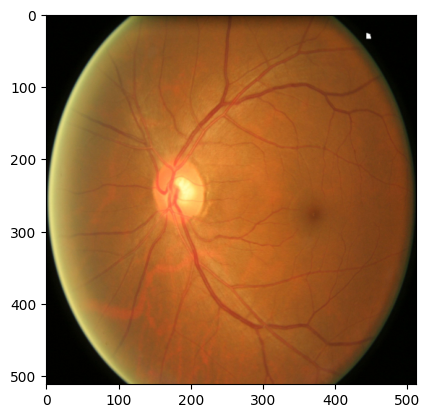

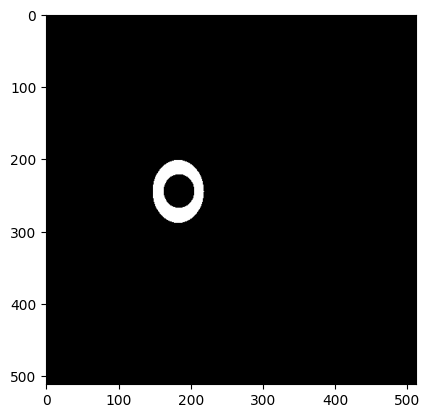

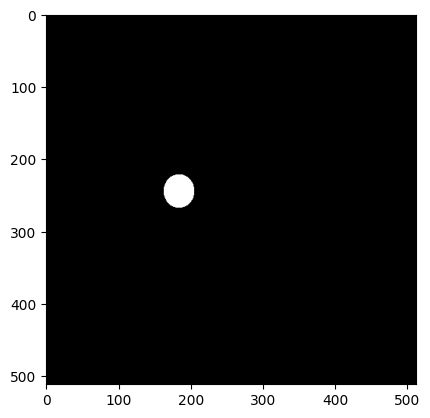

In [30]:
plt.imshow(x_train[1])
plt.show()
plt.imshow(y_train[1][:,:,0], cmap='gray')
plt.show()
plt.imshow(y_train[1][:,:,1], cmap='gray')
plt.show()

In [31]:
def get_callbacks(model_name):
    callbacks =[]
    tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
    callbacks.append(tensor_board)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='val_loss',mode='min',save_best_only=True)
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2, min_lr=0.0000001,min_delta=0.00001,mode='auto') 
    callbacks.append(anne)
    return callbacks

In [32]:
# (x_train[8])
# plt.imshow(x_train[8]/255.)
# # y_train[2].shape

In [33]:
x_train= np.array(x_train)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(x_train.shape)
y_train.shape
y_test.shape

(140, 512, 512, 3)


(60, 512, 512, 2)

In [34]:
#model = load_model('/content/drive/MyDrive/glucomadata/weights.h5')

In [35]:
callbacks = get_callbacks('model')
history=model.fit(x_train,y_train,batch_size=1,verbose=1,epochs=50,validation_data=(np.array(x_test),np.array(y_test)),shuffle=False,callbacks=[callbacks])

Epoch 1/50
140/140 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9631 - iou: 0.1111 - dice_coef: 0.1921 - precision: 0.3074 - f1_score: 0.1329
Epoch 1: val_loss improved from inf to 0.15305, saving model to model.model.h5
140/140 [==============================] - 89s 417ms/step - loss: 0.0435 - accuracy: 0.9631 - iou: 0.1111 - dice_coef: 0.1921 - precision: 0.3074 - f1_score: 0.1329 - val_loss: 0.1531 - val_accuracy: 0.9930 - val_iou: 3.6419e-06 - val_dice_coef: 7.2836e-06 - val_precision: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/50
140/140 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9780 - iou: 0.1594 - dice_coef: 0.2688 - precision: 0.4769 - f1_score: 0.1329
Epoch 2: val_loss did not improve from 0.15305
140/140 [==============================] - 61s 436ms/step - loss: 0.0262 - accuracy: 0.9780 - iou: 0.1594 - dice_coef: 0.2688 - precision: 0.4769 - f1_score: 0.1329 - val_loss: 0.1532 - val_accuracy: 0.9933 - va

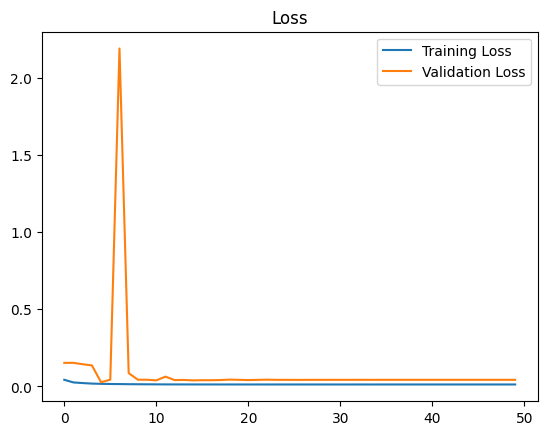

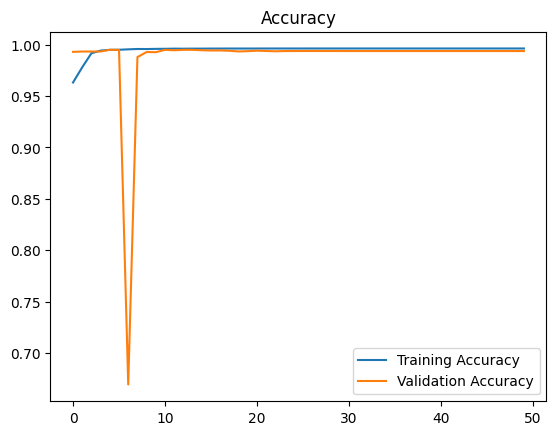

In [36]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)  

# Testing

In [37]:
model.save('/content/drive/MyDrive/glucomadata/weights.h5')

In [47]:
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

NameError: ignored

1/1 [==============================] - 0s 69ms/step


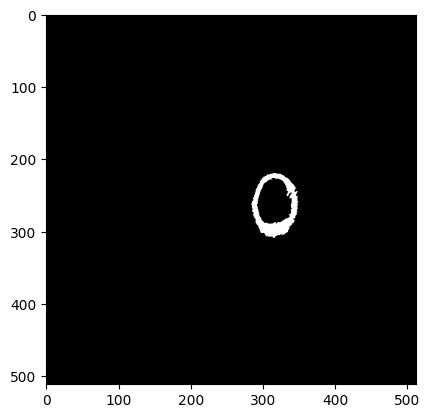

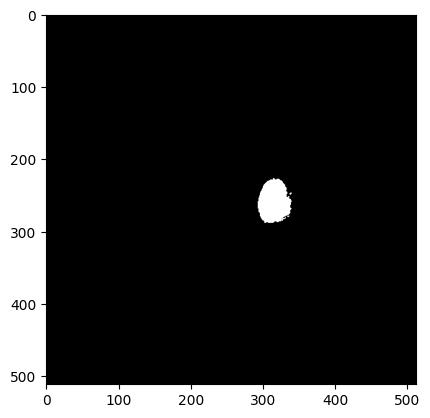

In [61]:
img = np.array((x_test[20]))
# img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
img.shape
np.unique(img)
img1 = np.expand_dims(img,axis =0)
img1.shape

prediction = model.predict(img1)
prediction.shape
plt.imshow(prediction[0][:,:,0]>0.5, cmap='gray')
plt.show()
plt.imshow(prediction[0][:,:,1]>0.5, cmap='gray')
plt.show()


1/1 [==============================] - 0s 37ms/step


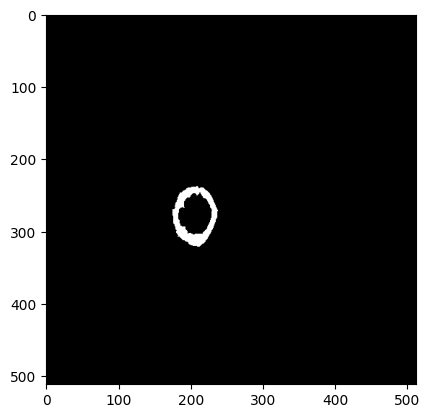

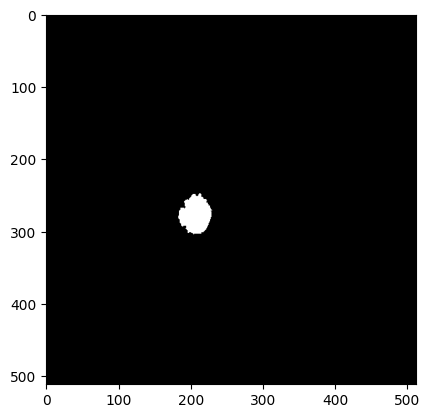

In [59]:
img = np.array((x_test[13]))
# img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
img.shape
np.unique(img)
img1 = np.expand_dims(img,axis =0)
img1.shape

prediction = model.predict(img1)
prediction.shape
plt.imshow(prediction[0][:,:,0]>0.5, cmap='gray')
plt.show()
plt.imshow(prediction[0][:,:,1]>0.5, cmap='gray')
plt.show()

In [ ]:
#model = load_model('/content/drive/MyDrive/glucomadata/weights.h5')

1/1 [==============================] - 0s 30ms/step


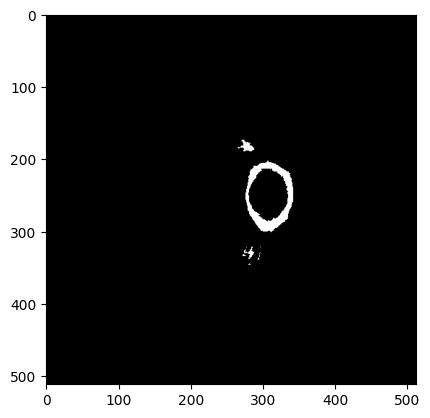

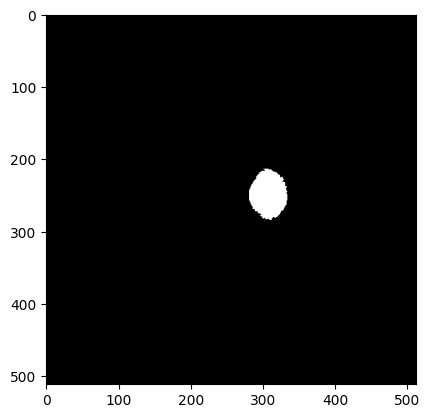

In [57]:
img = np.array((x_test[8]))
# img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
img.shape
np.unique(img)
img1 = np.expand_dims(img,axis =0)
img1.shape

prediction = model.predict(img1)
prediction.shape
plt.imshow(prediction[0][:,:,0]>0.5, cmap='gray')
plt.show()
plt.imshow(prediction[0][:,:,1]>0.5, cmap='gray')
plt.show()

1/1 [==============================] - 0s 22ms/step


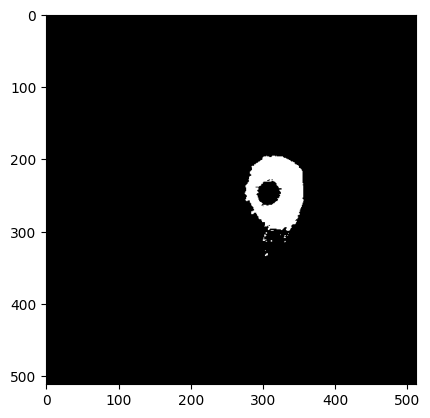

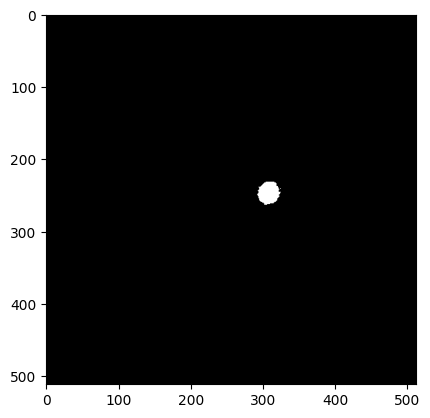

In [55]:
img = np.array((x_test[15]))
# img = cv2.resize(img, (512,512),interpolation = cv2.INTER_AREA)
img.shape
np.unique(img)
img1 = np.expand_dims(img,axis =0)
img1.shape

prediction = model.predict(img1)
prediction.shape
plt.imshow(prediction[0][:,:,0]>0.5, cmap='gray')
plt.show()
plt.imshow(prediction[0][:,:,1]>0.5, cmap='gray')
plt.show()